In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive

/content/drive/My Drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
bs = 32

In [0]:
path_img = Path('fast-data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1450 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: fast-data;

Valid: LabelList (307 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: fast-data;

Test: None

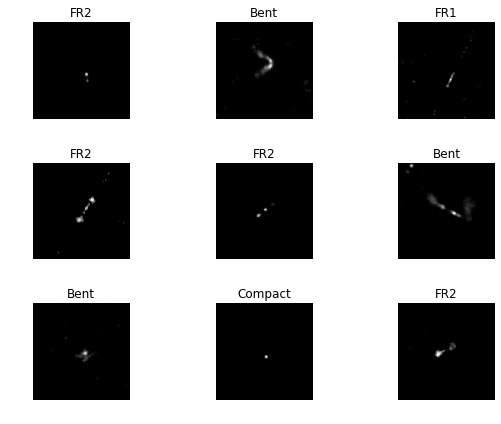

In [0]:
data.show_batch(rows=3, figsize=(8,6))

In [0]:
print(data.classes)
len(data.classes), data.c

['Bent', 'Compact', 'FR1', 'FR2']


(4, 4)

In [0]:
learn = create_cnn(data, models.densenet201, metrics=error_rate)

In [0]:
learn.fit_one_cycle(15)

In [0]:
learn.save('fai_dense201_lt')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

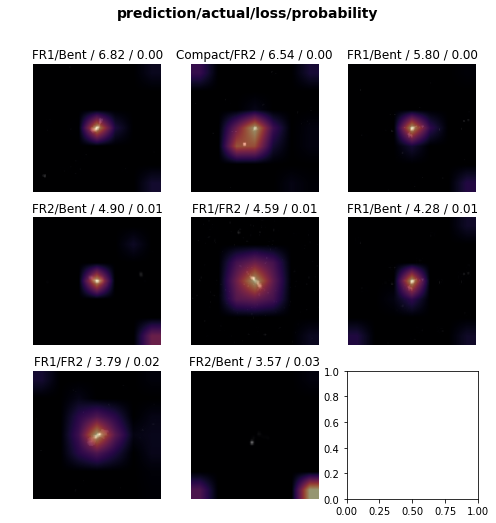

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

In [0]:
interp.most_confused(min_val=2)

[('FR1', 'FR2', 4), ('Bent', 'FR1', 3), ('Bent', 'FR2', 3), ('FR2', 'FR1', 3)]

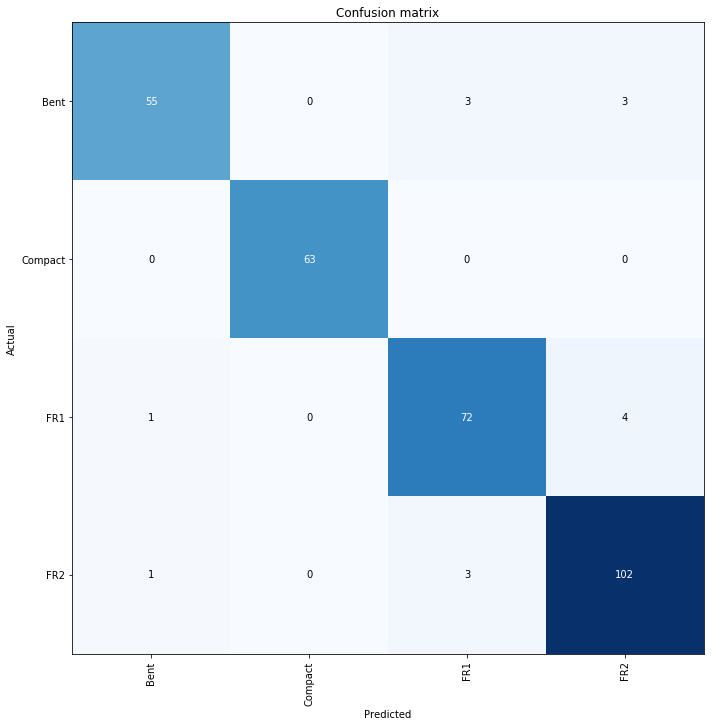

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
learn.export('lt-201.pkl')

In [0]:
img = open_image('fast-data/test/Bent/J003113.86+001236.2.jpeg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [0]:
learn = create_cnn(data, models.densenet201, metrics=error_rate)

In [0]:
learn.load('fai_dense201_lt')

In [7]:
#Testing the model

path_img = Path('fast-data')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1450 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: fast-data;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bent,Bent,Bent,Bent,Bent
Path: fast-data;

Test: None

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

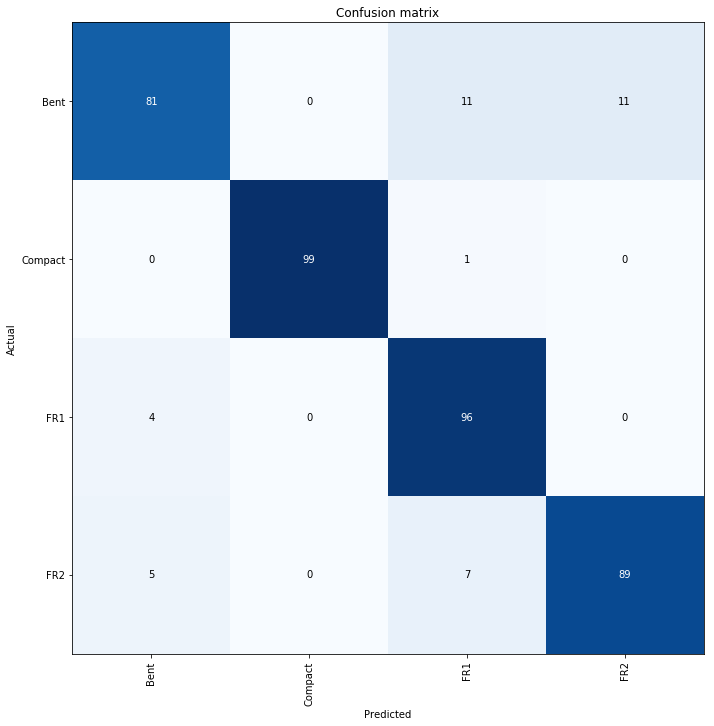

In [0]:
interp.plot_confusion_matrix(figsize=(10,10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


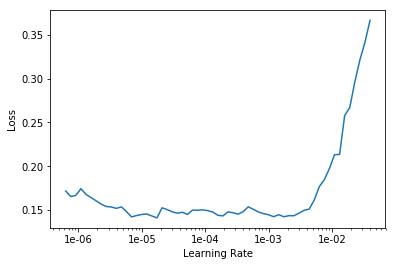

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

In [0]:
learn.save('RG_fai_dense201lt2')

In [0]:
learn.export('dense201-lt2')

In [5]:
learn = learn.load('RG_fai_dense201lt2')

NameError: ignored

In [8]:
learn = create_cnn(data, models.densenet201, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 81131730/81131730 [00:02<00:00, 28299663.20it/s]


In [0]:
learn = learn.load('RG_fai_dense201lt2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

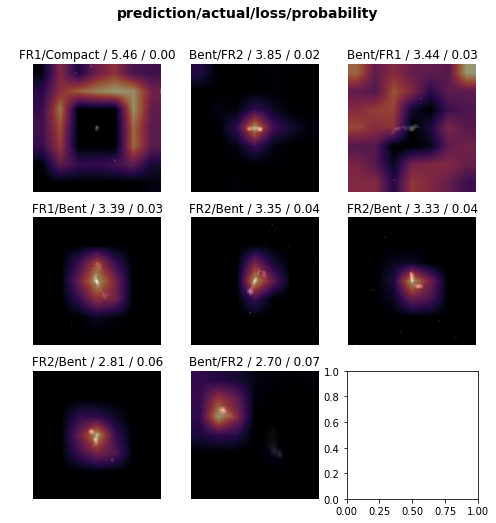

In [0]:
interp.plot_top_losses(8, figsize=(8,8))

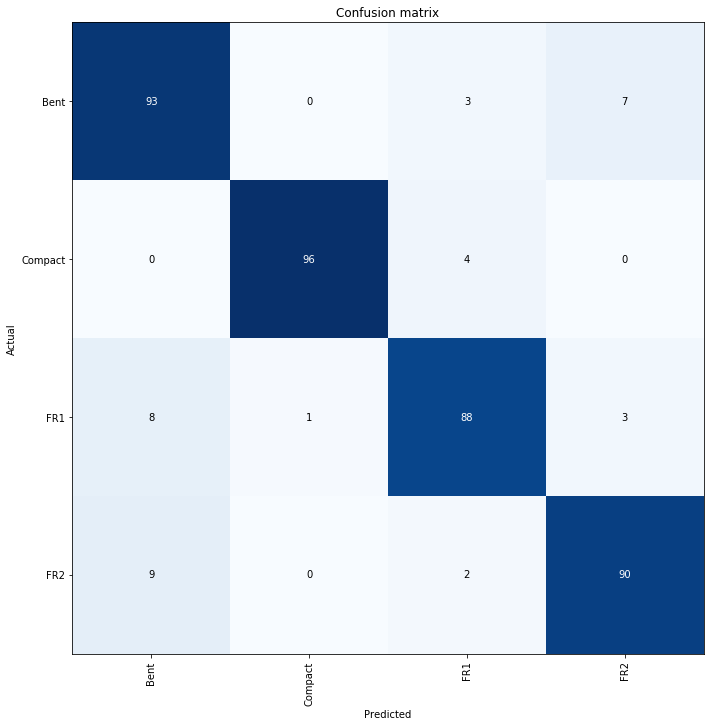

In [9]:
interp.plot_confusion_matrix(figsize=(10,10))

In [0]:
img = open_image('fast-data/test/Bent/J003113.86+001236.2.jpeg')

In [0]:
import glob

image_list = glob.glob('fast-data/test/*/*')

Bent = 0
Pred_Bent=0
Compact=0
Pred_Compact=0
FRI=0
Pred_FRI=0
FRII=0
Pred_FRII = 0 

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    rg_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if rg_class == 'Bent':
        Bent += 1
        if pred_class == 'Bent':
            Pred_Bent += 1
    elif rg_class == 'Compact':
        Compact += 1
        if pred_class == 'Compact':
            Pred_Compact += 1
    elif rg_class == 'FR1':
        FRI += 1
        if pred_class == 'FR1':
            Pred_FRI += 1
    elif rg_class == 'FR2':
        FRII += 1
        if pred_class == 'FR2':
            Pred_FRII += 1
            
    
print('Bent accuracy: ' + str(Pred_Bent) + '/' + str(Bent))
print('Compact accuracy: ' + str(Pred_Compact) + '/' + str(Compact))
print('FR1 accuracy: ' + str(Pred_FRI) + '/' + str(FRI) )
print('FR2 accuracy: ' + str(Pred_FRII) + '/' + str(FRII) )

In [0]:
interp.most_confused(min_val=2)

[('Bent', 'FR1', 6),
 ('FR2', 'FR1', 6),
 ('FR1', 'FR2', 4),
 ('FR2', 'Bent', 4),
 ('Bent', 'FR2', 2),
 ('FR1', 'Bent', 2)]

In [0]:
learn.export('dense201-lt2.pkl')